# Example of the aitlas toolbox in the context of image segmentation

## Import the required packages

In [ ]:
from aitlas.datasets import CESBIO_AI4QCDataset
from aitlas.models import DeepLabV3
from aitlas.models import DeepLabV3_13_bands
from aitlas.utils import image_loader
from aitlas.transforms import MinMaxNormTranspose
from aitlas.transforms import ResizeToTensor

## Visualize images and masks

Total number of patches: 30


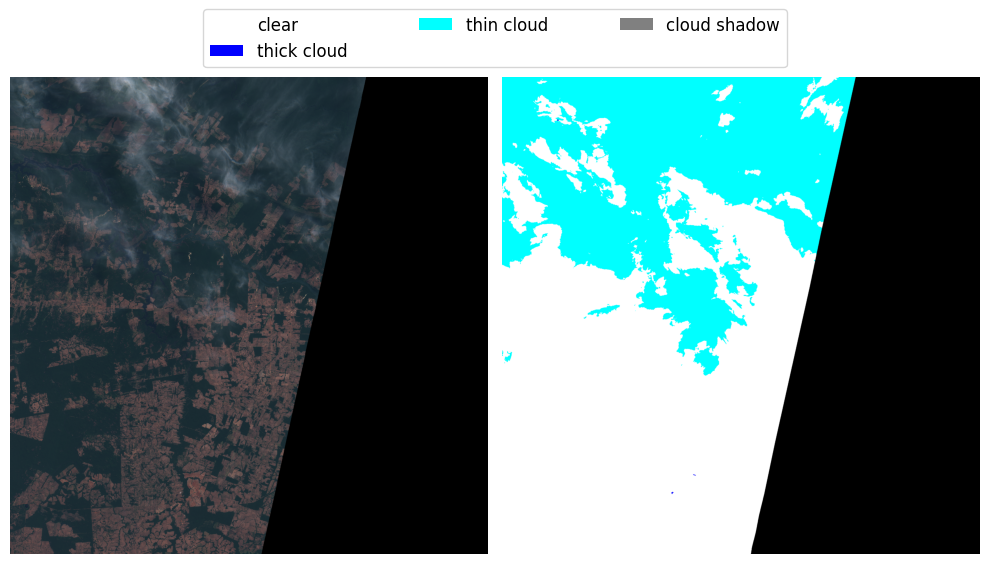

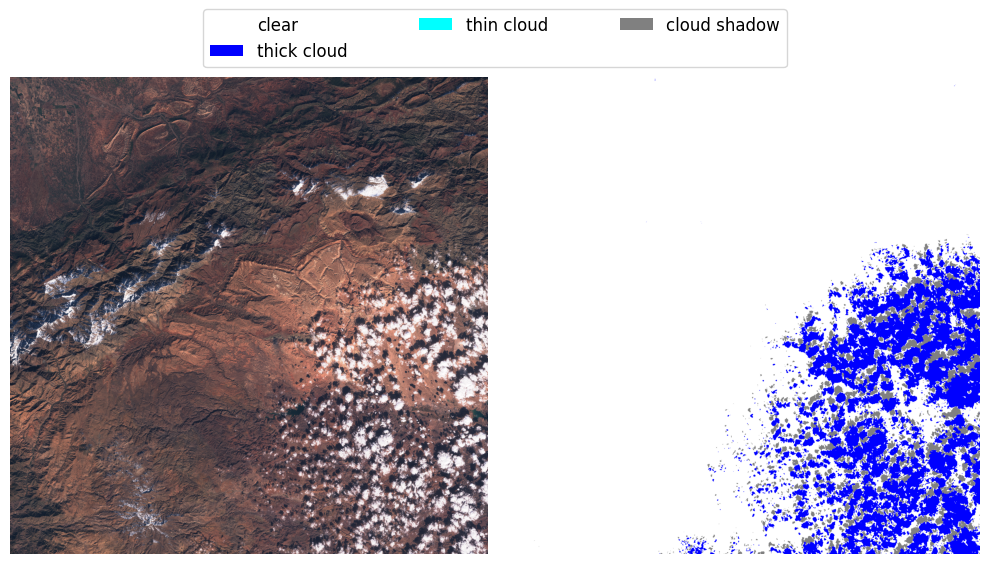

In [11]:
dataset_config = {
    "data_dir": "/home/dragik/data/CESBIO/Reference_dataset",
    "selection":"rgb"
}
dataset = CESBIO_AI4QCDataset(dataset_config)

print(f"Total number of patches: {len(dataset)}")
dataset.show_image(4);
dataset.show_image(20);

In [4]:
dataset.data_distribution_table()

,Number of pixels
clear,62017108.0
thick cloud,10277196.0
thin cloud,10552946.0
cloud shadow,2281911.0


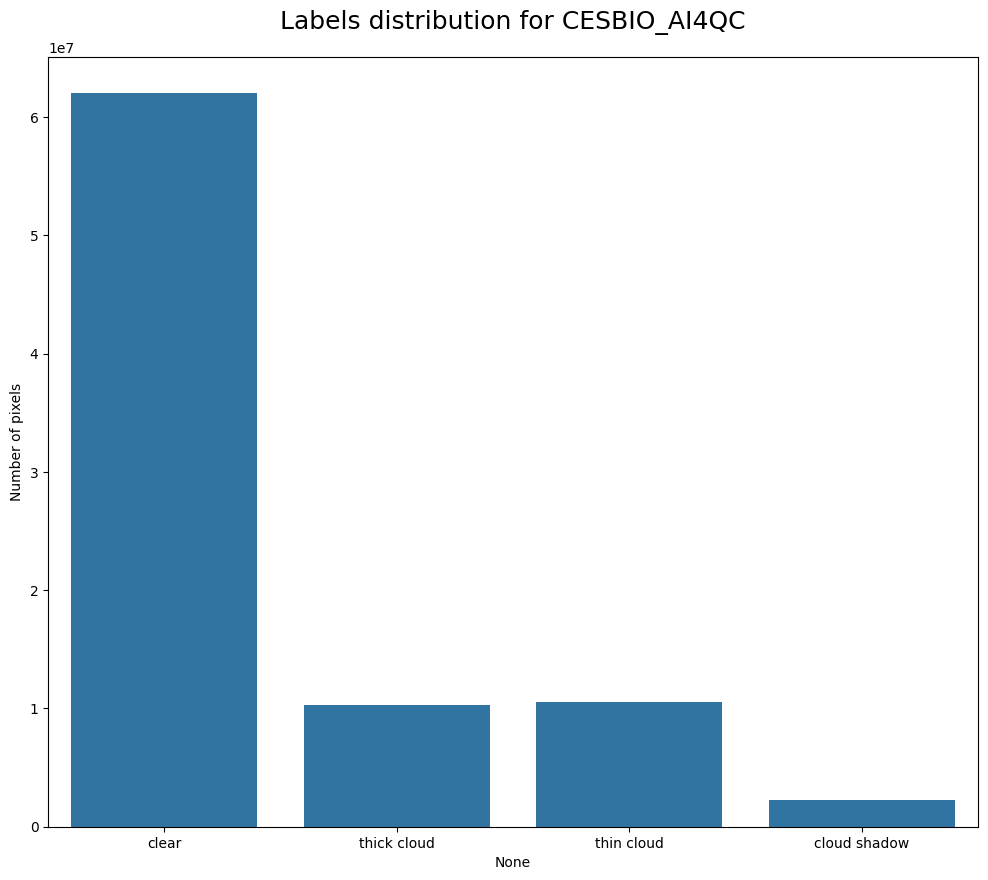

In [6]:
dataset.data_distribution_barchart();

# Working with Sentinel-2 true color RGB images

## Load training data

In [9]:
train_dataset_config = {
    "batch_size": 4,
    "shuffle": True,
    "num_workers": 0,
    "data_dir": "/home/dragik/data/CESBIO/Reference_dataset",
    "transforms": ["aitlas.transforms.MinMaxNormTranspose","aitlas.transforms.ResizeToTensor"],
    "target_transforms": ["aitlas.transforms.Transpose","aitlas.transforms.ResizePerChannelToTensor"]
}
train_dataset = CESBIO_AI4QCDataset(train_dataset_config)
len(train_dataset)

30

## Create the model

In [13]:
epochs = 5
model_directory = "/home/dragik/data/CESBIO/experiments_rgb"
model_config = {
    "num_classes": 4, 
    "learning_rate": 0.0001,
    "pretrained": True, 
    "threshold": 0.5,
    "metrics": ["iou"]
}

model = DeepLabV3(model_config)
model.prepare()

## Start the training

In [14]:
model.train_model(
    train_dataset=train_dataset,
    epochs=epochs,
    model_directory=model_directory,
    run_id='1'
);

Starting training.


training: 100%|███████████████████████████████████████████████████████████████████████████| 8/8 [00:05<00:00,  1.41it/s]

epoch: 1, time: 6, loss:  0.69116



testing on train set: 100%|███████████████████████████████████████████████████████████████| 8/8 [00:03<00:00,  2.08it/s]

IOU:0.2838411080225412, IOU mean:0.2025863181484857, IOU per Class:[0.60962053 0.09294046 0.10599566 0.00178862]



training: 100%|███████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.87it/s]

epoch: 2, time: 4, loss:  0.64340



testing on train set: 100%|███████████████████████████████████████████████████████████████| 8/8 [00:03<00:00,  2.01it/s]

IOU:0.34614238182056406, IOU mean:0.2571450038858177, IOU per Class:[0.66045143 0.14537018 0.22127363 0.00148477]



training: 100%|███████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.78it/s]

epoch: 3, time: 5, loss:  0.61121



testing on train set: 100%|███████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.93it/s]

IOU:0.4606096313958206, IOU mean:0.2849250959216642, IOU per Class:[0.69685723 0.18980361 0.24977871 0.00326083]



training: 100%|███████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.80it/s]

epoch: 4, time: 4, loss:  0.56888



testing on train set: 100%|███████████████████████████████████████████████████████████████| 8/8 [00:03<00:00,  2.01it/s]

IOU:0.4751759717609708, IOU mean:0.3009044797172848, IOU per Class:[0.75338454 0.18677998 0.25880289 0.0046505 ]



training: 100%|███████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.86it/s]

epoch: 5, time: 4, loss:  0.55167



testing on train set: 100%|███████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  2.00it/s]

IOU:0.47767748315566044, IOU mean:0.3068302077425313, IOU per Class:[0.77113429 0.19723693 0.25497043 0.00397918]


Train loss: [0.6410706202189128, 0.5996386130650838, 0.5506358544031779, 0.523822836081187, 0.5066927393277486]
Validation loss: []
Train time per epochs: [6, 4, 5, 4, 4]
Finished training. training time: 23


# Working with the 13 bands of Sentinel-2

## Load training data

In [7]:
train_dataset_config = {
    "batch_size": 4,
    "shuffle": True,
    "num_workers": 0,
    "selection":"all",
    "data_dir": "/home/dragik/data/CESBIO/Reference_dataset",
    "target_transforms": ["aitlas.transforms.Transpose","aitlas.transforms.ResizePerChannelToTensor"],
}
train_dataset = CESBIO_AI4QCDataset(train_dataset_config)
len(train_dataset)

30

## Create the model

In [23]:
epochs = 5
model_directory = "/home/dragik/data/CESBIO/experiments"
model_config = {
    "num_classes": 4, 
    "learning_rate": 0.0001,
    "pretrained": False, 
    "threshold": 0.5,
    "metrics": ["iou"],
    "input_dim": 13
}

model = DeepLabV3_13_bands(model_config)
model.prepare()

## Start the training

In [24]:
model.train_model(
    train_dataset=train_dataset,
    epochs=epochs,
    model_directory=model_directory,
    run_id='1'
);

Starting training.


training: 100%|██████████████████████████████████████████████████████████████████████████| 8/8 [37:39<00:00, 282.46s/it]

epoch: 1, time: 2260, loss:  0.66978



testing on train set: 100%|██████████████████████████████████████████████████████████████| 8/8 [37:27<00:00, 280.93s/it]

IOU:0.04336128209093525, IOU mean:0.0452360106868303, IOU per Class:[5.47927823e-05 9.75042807e-02 8.15245256e-02 1.86044367e-03]



training: 100%|██████████████████████████████████████████████████████████████████████████| 8/8 [37:45<00:00, 283.19s/it]

epoch: 2, time: 2266, loss:  0.57029



testing on train set: 100%|██████████████████████████████████████████████████████████████| 8/8 [37:44<00:00, 283.02s/it]

IOU:0.05222962970892111, IOU mean:0.03967857370342806, IOU per Class:[0.0033168  0.06027142 0.09328801 0.00183806]



training: 100%|██████████████████████████████████████████████████████████████████████████| 8/8 [37:49<00:00, 283.69s/it]

epoch: 3, time: 2269, loss:  0.54559



testing on train set: 100%|██████████████████████████████████████████████████████████████| 8/8 [37:41<00:00, 282.70s/it]

IOU:0.06300873376625948, IOU mean:0.054150017381359744, IOU per Class:[0.01991951 0.0858541  0.10835644 0.00247002]



training: 100%|██████████████████████████████████████████████████████████████████████████| 8/8 [37:44<00:00, 283.06s/it]

epoch: 4, time: 2265, loss:  0.49945



testing on train set: 100%|██████████████████████████████████████████████████████████████| 8/8 [37:46<00:00, 283.29s/it]

IOU:0.20220112579580282, IOU mean:0.13566098246110153, IOU per Class:[0.2742768  0.13456695 0.13173446 0.00206572]



training: 100%|██████████████████████████████████████████████████████████████████████████| 8/8 [37:47<00:00, 283.40s/it]

epoch: 5, time: 2267, loss:  0.49473



testing on train set: 100%|██████████████████████████████████████████████████████████████| 8/8 [37:43<00:00, 282.91s/it]

IOU:0.24884429680941308, IOU mean:0.19471523301891477, IOU per Class:[5.69440295e-01 1.04398478e-01 1.04774330e-01 2.47829050e-04]


Train loss: [0.8265849073727926, 0.8683152914047241, 0.8444369991620382, 0.7039928595225017, 0.6280074675877889]
Validation loss: []
Train time per epochs: [2260, 2266, 2269, 2265, 2267]
Finished training. training time: 11327
